#COLAB SETUP

In [96]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [97]:
cd drive/My Drive

[Errno 2] No such file or directory: 'drive/My Drive'
/content/drive/My Drive/Colab Notebooks/proj


In [98]:
cd Colab\ Notebooks

[Errno 2] No such file or directory: 'Colab Notebooks'
/content/drive/My Drive/Colab Notebooks/proj


In [99]:
cd proj/

[Errno 2] No such file or directory: 'proj/'
/content/drive/My Drive/Colab Notebooks/proj


In [100]:
ls

sampleSubmission.csv  test.csv  train.csv  Untitled.ipynb


# Get ORIGINAL Data


In [101]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [102]:
train_data = pd.read_csv('train.csv', parse_dates = ['Dates'])
test_data = pd.read_csv('test.csv', parse_dates = ['Dates'])

In [103]:
train_data.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [104]:
test_data.head()

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


# CONCLUDE CRIMES INTO 8 CATEGORIES 

In [42]:
new_train = train_data[['Category','DayOfWeek']]
new_train['crime'] = crime_type
hrs = train_data.Dates.dt.hour
new_train['hour'] = hrs
new_train['year'] = train_data.Dates.dt.year
new_train['month'] = train_data.Dates.dt.month
le1 = LabelEncoder()
decode_week = le1.fit_transform(train_data.DayOfWeek)
new_train['weekday'] = decode_week
le2 = LabelEncoder()
decode_pd = le2.fit_transform(train_data.PdDistrict)
new_train['Police_district'] = decode_pd


In [43]:
new_train['Category'].unique()

array(['WARRANTS', 'OTHER OFFENSES', 'LARCENY/THEFT', 'VEHICLE THEFT',
       'VANDALISM', 'NON-CRIMINAL', 'ROBBERY', 'ASSAULT', 'WEAPON LAWS',
       'BURGLARY', 'SUSPICIOUS OCC', 'DRUNKENNESS',
       'FORGERY/COUNTERFEITING', 'DRUG/NARCOTIC', 'STOLEN PROPERTY',
       'SECONDARY CODES', 'TRESPASS', 'MISSING PERSON', 'FRAUD',
       'KIDNAPPING', 'RUNAWAY', 'DRIVING UNDER THE INFLUENCE',
       'SEX OFFENSES FORCIBLE', 'PROSTITUTION', 'DISORDERLY CONDUCT',
       'ARSON', 'FAMILY OFFENSES', 'LIQUOR LAWS', 'BRIBERY',
       'EMBEZZLEMENT', 'SUICIDE', 'LOITERING',
       'SEX OFFENSES NON FORCIBLE', 'EXTORTION', 'GAMBLING', 'BAD CHECKS',
       'TREA', 'RECOVERED VEHICLE', 'PORNOGRAPHY/OBSCENE MAT'],
      dtype=object)

In [44]:
choices={
    'WARRANTS':'THEFT RELATED',
    'LARCENY/THEFT':'THEFT RELATED',
    'VEHICLE THEFT':'THEFT RELATED',
    'STOLEN PROPERTY':'THEFT RELATED',

    'PORNOGRAPHY/OBSCENE MAT':'SEX RELATED',
    'PROSTITUTION':'SEX RELATED',
    'SEX OFFENSES FORCIBLE':'SEX RELATED',
    'SEX OFFENSES NON FORCIBLE':'SEX RELATED',

    'ROBBERY':'LIFE THREATEN',
    'SUICIDE':'LIFE THREATEN',
    'FAMILY OFFENSES':'LIFE THREATEN',
    'KIDNAPPING':'LIFE THREATEN',
    'TRESPASS':'LIFE THREATEN',
    'MISSING PERSON':'LIFE THREATEN',
    'DRUG/NARCOTIC':'LIFE THREATEN',


    'ASSAULT':'MANNER ISSUE',
    'DISORDERLY CONDUCT':'MANNER ISSUE',
    'LOITERING':'MANNER ISSUE',
    'LIQUOR LAWS':'MANNER ISSUE',
    'RUNAWAY':'MANNER ISSUE',
    'EXTORTION':'MANNER ISSUE',
    'DRUNKENNESS':'MANNER ISSUE',
    'SUSPICIOUS OCC':'MANNER ISSUE',
    'WEAPON LAWS':'MANNER ISSUE',

    'BRIBERY':'MONEY ISSUE',
    'FRAUD':'MONEY ISSUE',
    'BURGLARY':'MONEY ISSUE',
    'BAD CHECKS':'MONEY ISSUE',
    'GAMBLING':'MONEY ISSUE',
    'FORGERY/COUNTERFEITING':'MONEY ISSUE',
    'VANDALISM':'MONEY ISSUE',
    'SECONDARY CODES':'MONEY ISSUE',
    'TREA':'MONEY ISSUE',
    'EMBEZZLEMENT':'MONEY ISSUE',
    'ARSON':'MONEY ISSUE',

    'OTHER OFFENSES':'OTHER',

    'NON-CRIMINAL':'NON-CRIMINAL',

    'DRIVING UNDER THE INFLUENCE':'DRIVING ISSUE',
    'RECOVERED VEHICLE':'DRIVING ISSUE'
}

In [45]:
new_train['Category']=new_train['Category'].map(choices)

In [46]:
new_train['Category'].unique()

array(['THEFT RELATED', 'OTHER', 'MONEY ISSUE', 'NON-CRIMINAL',
       'LIFE THREATEN', 'MANNER ISSUE', 'DRIVING ISSUE', 'SEX RELATED'],
      dtype=object)

In [47]:
new_train

,Category,DayOfWeek,crime,hour,year,month,weekday,Police_district
0,THEFT RELATED,Wednesday,7,23,2015,5,6,4
1,OTHER,Wednesday,5,23,2015,5,6,4
2,OTHER,Wednesday,5,23,2015,5,6,4
3,THEFT RELATED,Wednesday,7,23,2015,5,6,4
4,THEFT RELATED,Wednesday,7,23,2015,5,6,5
...,...,...,...,...,...,...,...,...
878044,LIFE THREATEN,Monday,1,0,2003,1,1,8
878045,THEFT RELATED,Monday,7,0,2003,1,1,2
878046,THEFT RELATED,Monday,7,0,2003,1,1,7
878047,MONEY ISSUE,Monday,3,0,2003,1,1,7


In [48]:
lenew1 = LabelEncoder()
crime_type = lenew1.fit_transform(new_train.Category)

In [73]:
new_dataset = pd.concat([new_train['hour'], new_train['weekday'], new_train['Police_district'], new_train['month']], axis=1)

In [74]:
new_dataset['crime']=crime_type
new_dataset

,hour,weekday,Police_district,month,crime
0,23,6,4,5,7
1,23,6,4,5,5
2,23,6,4,5,5
3,23,6,4,5,7
4,23,6,5,5,7
...,...,...,...,...,...
878044,0,1,8,1,1
878045,0,1,2,1,7
878046,0,1,7,1,7
878047,0,1,7,1,3


In [75]:
X_new_train, X_new_val, Y_new_train, Y_new_val = train_test_split(new_dataset.iloc[:,:-1], new_dataset.iloc[:,-1], train_size=0.8)

# Visulization

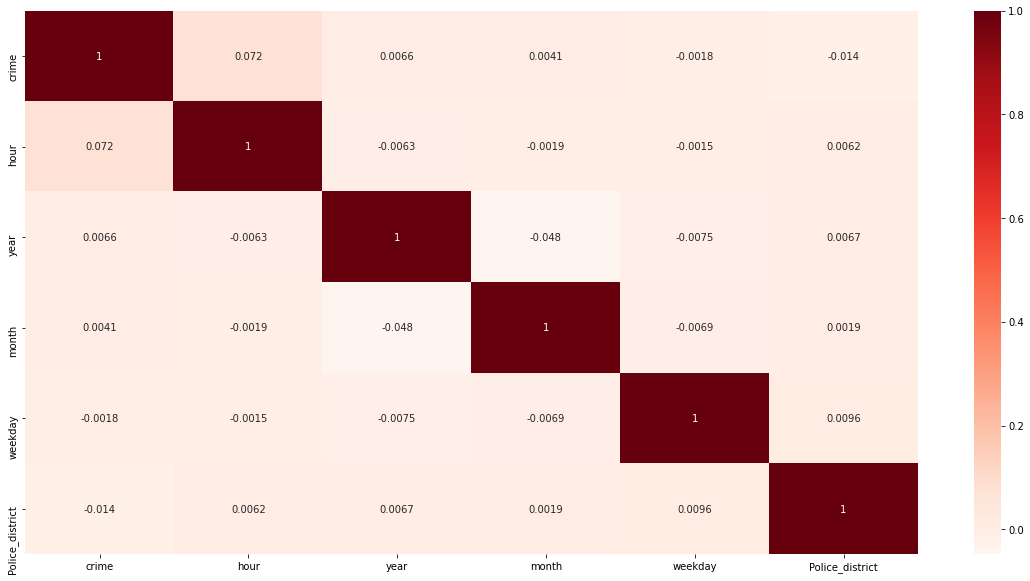

In [76]:
plt.figure(figsize=(20,10))
cor = new_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

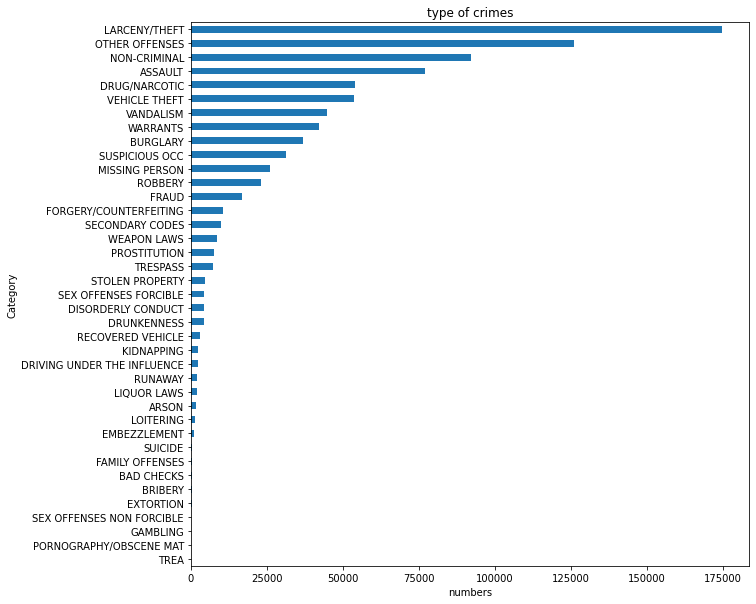

In [ ]:
#no. of crimes with all types
plt.figure(figsize=(10,10))
plt.title('type of crimes')
plt.xlabel('numbers')
crime1 = train_data.groupby(train_data['Category'])
crime_size = crime1.size()
crime_size.sort_values(ascending=True).plot.barh()
plt.show()

In [ ]:
top_5_crimes=crime_size.sort_values(ascending=False).head(5)
top_5_crimes

Category
LARCENY/THEFT     174900
OTHER OFFENSES    126182
NON-CRIMINAL       92304
ASSAULT            76876
DRUG/NARCOTIC      53971
dtype: int64

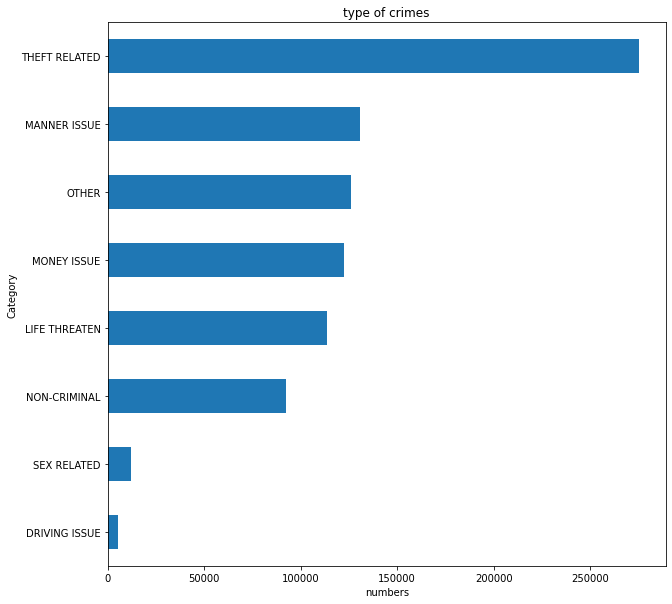

In [ ]:
plt.figure(figsize=(10,10))
plt.title('type of crimes')
plt.xlabel('numbers')
crime1 = new_train.groupby(new_train['Category'])
crime_size = crime1.size()
crime_size.sort_values(ascending=True).plot.barh()
plt.show()

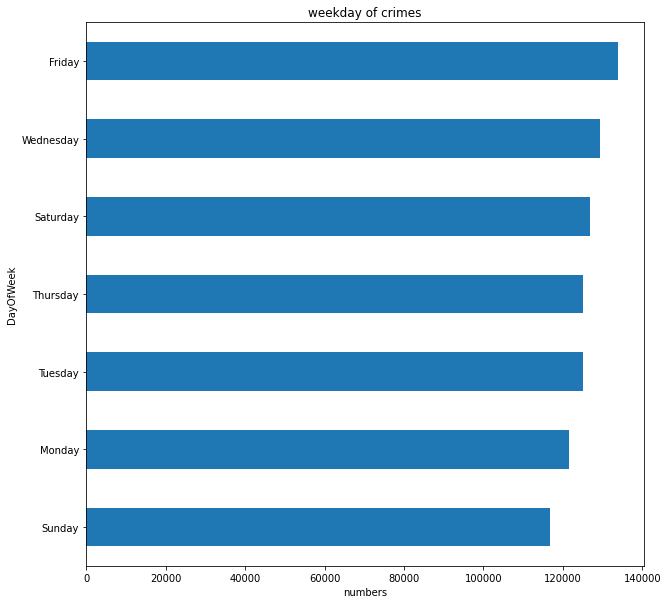

In [ ]:
#no. of days with crimes
plt.figure(figsize=(10,10))
plt.title('weekday of crimes')
plt.xlabel('numbers')
days = train_data.groupby(train_data['DayOfWeek'])
days_size = days.size()
days_size.sort_values(ascending=True).plot.barh()
plt.show()

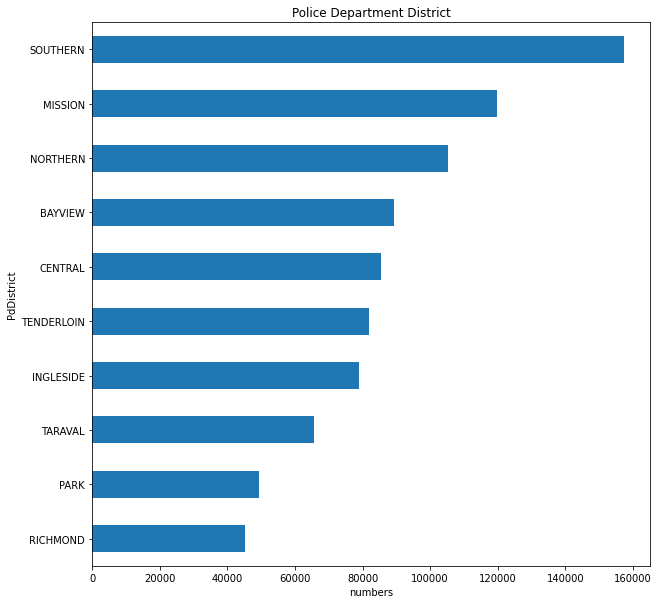

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Police Department District')
plt.xlabel('numbers')
district = train_data.groupby(train_data['PdDistrict'])
district_size = district.size()
district_size.sort_values(ascending=True).plot.barh()
plt.show()

In [ ]:
top_5_districts=district_size.sort_values(ascending=False).head(10)
top_5_districts

PdDistrict
SOUTHERN      157182
MISSION       119908
NORTHERN      105296
BAYVIEW        89431
CENTRAL        85460
TENDERLOIN     81809
INGLESIDE      78845
TARAVAL        65596
PARK           49313
RICHMOND       45209
dtype: int64

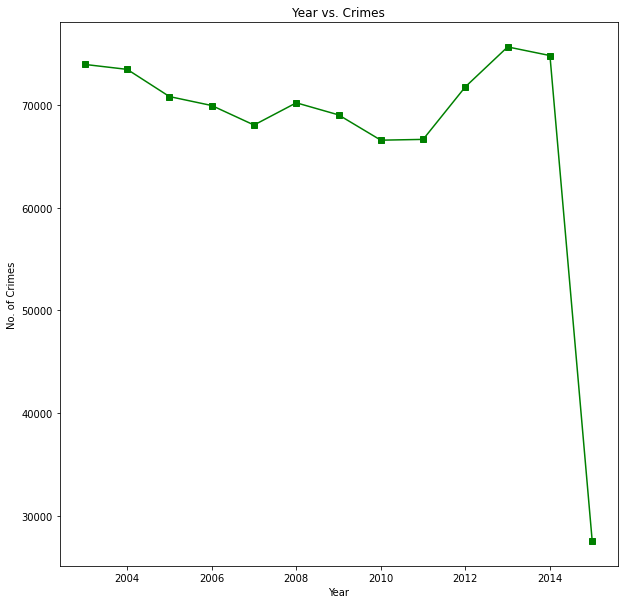

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Year vs. Crimes')
plt.xlabel('Year')
plt.ylabel('No. of Crimes')
year = train_data.groupby(train_data['Dates'].dt.year).size()
plt.plot(year, '-s', color='g', label='crimes')
plt.show()

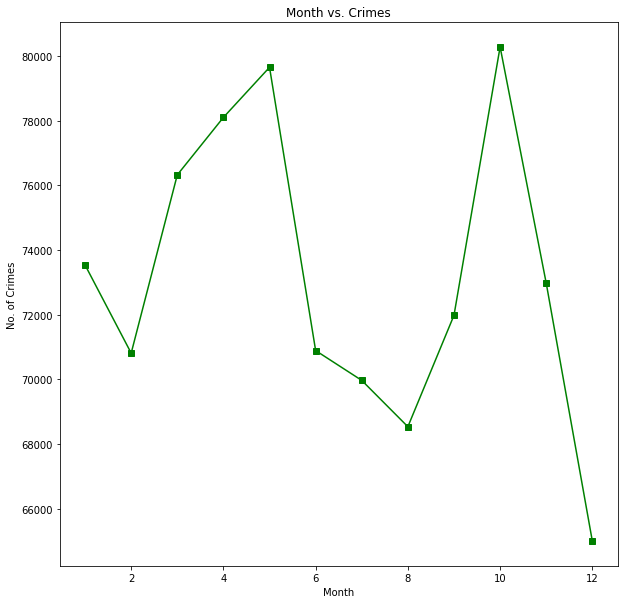

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Month vs. Crimes')
plt.xlabel('Month')
plt.ylabel('No. of Crimes')
year = train_data.groupby(train_data['Dates'].dt.month).size()
plt.plot(year, '-s', color='g', label='crimes')
plt.show()

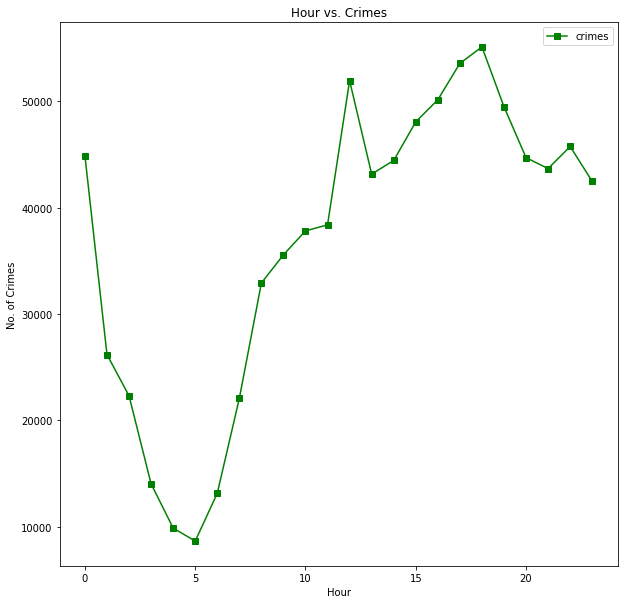

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Hour vs. Crimes')
plt.xlabel('Hour')
plt.ylabel('No. of Crimes')
hours = train_data.groupby(train_data['Dates'].dt.hour).size()
plt.plot(hours, '-s', color='g', label='crimes')
plt.legend()
plt.show()

No handles with labels found to put in legend.


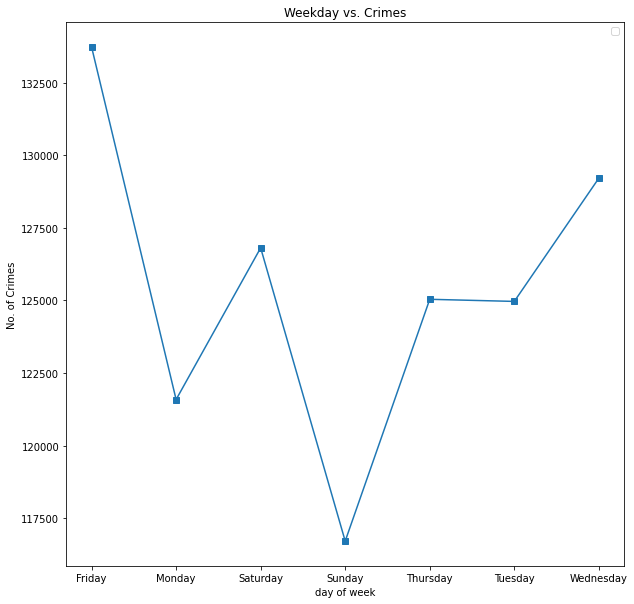

In [ ]:
weekdays = new_train.groupby(['DayOfWeek']).size()
plt.figure(figsize=(10,10))
plt.title('Weekday vs. Crimes')
plt.xlabel('day of week')
plt.ylabel('No. of Crimes')
plt.plot(weekdays, '-s')
plt.legend()
plt.show()

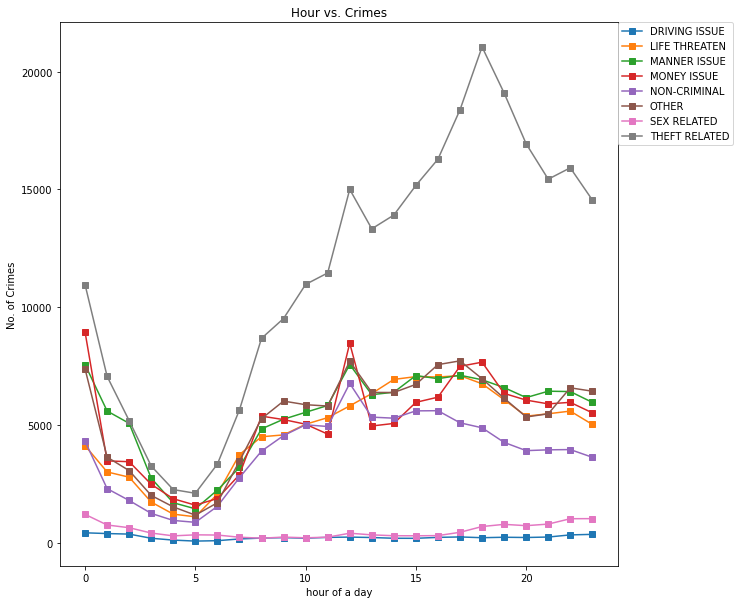

In [ ]:
cate = new_train.groupby(['Category','hour']).size().unstack().T
cate.plot(style='-s',figsize=(10,10))
plt.title('Hour vs. Crimes')
plt.xlabel('hour of a day')
plt.ylabel('No. of Crimes')
plt.legend(loc=2,bbox_to_anchor=(1,1),borderaxespad=0)
plt.show()

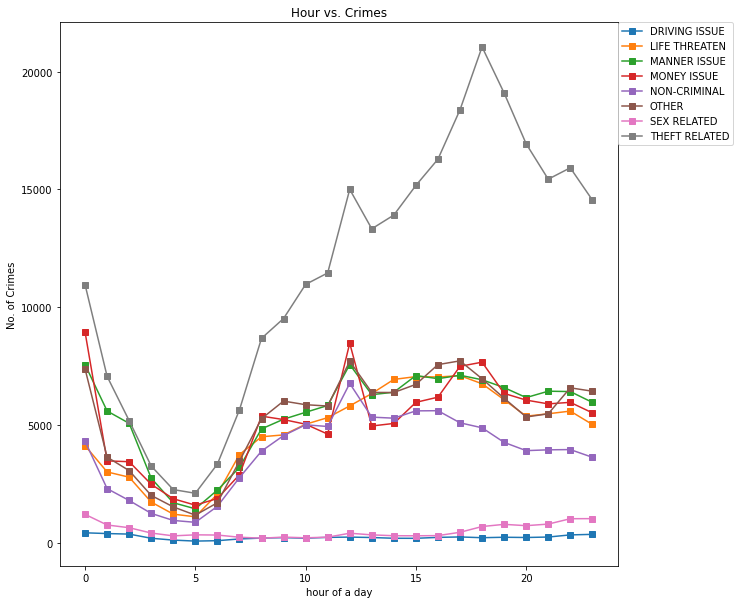

In [ ]:
cate = new_train.groupby(['Category','hour']).size().unstack().T
cate.plot(style='-s',figsize=(10,10))
plt.title('Hour vs. Crimes')
plt.xlabel('hour of a day')
plt.ylabel('No. of Crimes')
plt.legend(loc=2,bbox_to_anchor=(1,1),borderaxespad=0)
plt.show()

# NB






In [77]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

In [81]:
pt = pd.DataFrame(columns = ['Classifier', 'accuracy', 'loss'])


In [78]:
bayes = GaussianNB().fit(X_new_train, Y_new_train)
bayes_pred = bayes.predict(X_new_val)
bayes_loss = bayes.predict_proba(X_new_val)
print(f'accuracy for Navie Bayes: {100*accuracy_score(Y_new_val, bayes_pred)}%')
print(f'loss: {log_loss(Y_new_val, bayes_loss)}')

accuracy for Navie Bayes: 31.295484311827344%
loss: 1.7769917344985344


In [106]:
pt=pt[0:0]
gu = pd.DataFrame([['Naive Bayes',31.30,1.78]],columns = ['Classifier', 'accuracy', 'loss'])
pt = pt.append(gu)

In [107]:
pt

,Classifier,accuracy,loss
0,Naive Bayes,31.3,1.78


# Random Forest

In [79]:
from sklearn.ensemble import RandomForestClassifier


In [80]:
rf = RandomForestClassifier(max_depth=15).fit(X_new_train, Y_new_train)
rf_pred = rf.predict(X_new_val)
rf_loss = rf.predict_proba(X_new_val)
print(f'accuracy for Random Forest: {100*accuracy_score(Y_new_val, rf_pred)}%')
print(f'loss: {log_loss(Y_new_val, rf_loss)}')

accuracy for Random Forest: 31.570525596492228%
loss: 1.777117479168061


In [108]:
gu = pd.DataFrame([['Random Forest',31.57,1.78]],columns = ['Classifier', 'accuracy', 'loss'])
pt = pt.append(gu)

#LogisticRegression KNN



In [62]:
from sklearn.linear_model import LogisticRegression


In [63]:
clf = LogisticRegression(C=0.9, solver='saga')
clfp = clf.fit(X_new_train, Y_new_train)

clf_pred = clfp.predict(X_new_val)
names = clf.__class__.__name__
clf_loss = clf.predict_proba(X_new_val)
print(f'accuracy for {names}: {100*accuracy_score(Y_new_val, clf_pred)}%')
print(f'loss: {log_loss(Y_new_val, clf_loss)}')

accuracy for LogisticRegression: 31.366095324867604%
loss: 1.7836937495382723


In [109]:
gu = pd.DataFrame([['Logistic Regression',31.37,1.78]],columns = ['Classifier', 'accuracy', 'loss'])
pt = pt.append(gu)

In [64]:
from sklearn.neighbors import KNeighborsClassifier


In [105]:
clf = KNeighborsClassifier(8)
clfp = clf.fit(X_new_train, Y_new_train)
clf_pred = clfp.predict(X_new_val)
names = clf.__class__.__name__
clf_loss = clf.predict_proba(X_new_val)
print(f'accuracy for {names}: {100*accuracy_score(Y_new_val, clf_pred)}%')
print(f'loss: {log_loss(Y_new_val, clf_loss)}')

accuracy for KNeighborsClassifier: 24.113660953248676%
loss: 9.156292559802761


In [110]:
gu = pd.DataFrame([['KNN',24.11,11.78]],columns = ['Classifier', 'accuracy', 'loss'])
pt = pt.append(gu)

In [111]:
pt

,Classifier,accuracy,loss
0,Naive Bayes,31.30,1.78
0,Random Forest,31.57,1.78
0,Logistic Regression,31.37,1.78
0,KNN,24.11,11.78


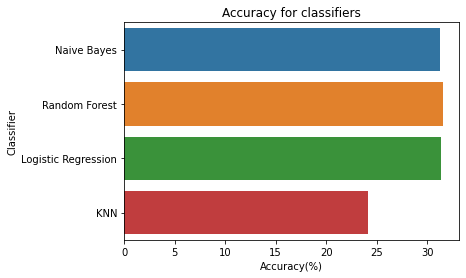

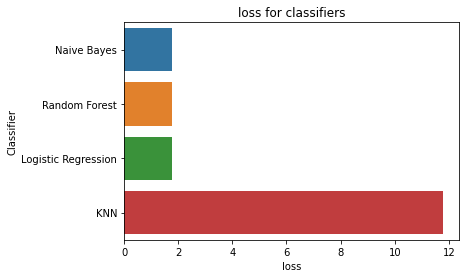

In [112]:

sns.barplot(x='accuracy',y='Classifier',data=pt)
plt.xlabel("Accuracy(%)")
plt.title('Accuracy for classifiers')
plt.show()

sns.barplot(x='loss',y='Classifier',data=pt)
plt.xlabel("loss")
plt.title('loss for classifiers')
plt.show()